# VBSR analysis on HM 27 Figueroa methylation probes

In [4]:
library(vbsr)
library(dplyr)
library(mygene)
source('../R/regressionModel/regressionModel.R')

## Complete linkage (7 clusters)

In [2]:
Figueroa.HM27 <- read.csv('/oak/stanford/groups/andrewg/users/szmamie/repos/MethylationPrediction/data/LAML/processed/Figueroa-HM27-imputed-M.tsv',
                          stringsAsFactor=F, sep='\t', header=F)

In [3]:
head(Figueroa.HM27)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172
TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03,cluster,NA
PHF13,0.342376841331799,3.89910990638938,-0.325894750548895,2.1324051221441,0.604472915779244,4.27645233912584,0.093982236583543,1.60238123283841,-2.45781768914949,⋯,-0.201732689805535,2.94982830365201,-4.42311450565101,0.705369300814628,1.84476939112185,2.15034737355097,-4.59156551295046,4.08057608543529,1.00697327270491,1
PHF13,-5.22598597418404,-5.11684373013096,-5.59435575996802,-4.17937111441898,-4.72164634816468,-4.91395229877669,-5.67461066104599,-5.26879334031999,-5.28560771811977,⋯,-5.42118276581357,-3.36367432508735,-4.94310390834695,-5.2486713326837,-5.32255570040772,-4.89702470896927,-4.66422658600223,-4.57026667855023,-5.18286174945182,2
HNRNPR,-5.98477094559978,-6.14078503056123,-6.14538887332879,-5.68016085539579,-6.01316195106498,-6.09873142274823,-5.98669727102667,-6.11167512049861,-5.52516418820383,⋯,-6.30276225949751,-5.68040714873043,-5.84716625780783,-5.93650679036303,-5.59487458900063,-5.94130798538348,-5.68344161879283,-6.04817487186585,-5.9765394215296,3
HNRNPR,-6.31151840380188,-6.69978520594554,-6.5491665758449,-6.24093411211342,-6.45301991137715,-6.41814191252889,-6.3492665374453,-6.74797548961094,-6.35505423087002,⋯,-6.52070266277027,-6.06375826608988,-6.54373711390798,-6.45268151940333,-6.53240163016061,-6.27158568589436,-6.26292949236407,-6.53161732738339,-6.64201546279755,3
THEM4,-6.36827289879088,-4.36827827171716,2.41865353299124,-1.14802693769955,-3.68997510054073,-4.17801001140916,-6.13787492336051,-2.60659130641118,-5.8448660027715,⋯,-5.99879639417634,-1.90991578946699,-6.35759738995619,-6.15121053439478,-5.42941792108019,-5.89069422606636,2.65178681945372,-4.85115230972334,-6.21498491274878,2


In [4]:
HM27 <- data.matrix(Figueroa.HM27[-1,-1])

rownames(HM27) <- Figueroa.HM27[-1,1]
colnames(HM27) <- Figueroa.HM27[1,-dim(Figueroa.HM27)[2]]

head(HM27)

table(HM27[,dim(HM27)[2]]) # number of probes in each cluster

## Compute the average of methylation level within each cluster

In [7]:
findClusterIdx <- function(i) {
    n <- dim(HM27)[2]
    which(HM27[,n] == i)
}

computeAverage <- function(idx) {
    n <- dim(HM27)[2]
    cluster.probes <- HM27[idx, -n]
    cbind(apply(cluster.probes, 2, mean), apply(cluster.probes, 2, sd))
}

## Input for VBSR functions

In [12]:
# load the RNAseq data
rnaseq.raw <- read.csv('../data/LAML/processed/rnaseq-imputed-matched-filtered.tsv', sep='\t', stringsAsFactor=F, header=F)

rnaseq <- data.matrix(rnaseq.raw[-1, -1])
colnames(rnaseq) <- rnaseq.raw[1, -dim(rnaseq.raw)[2]]
rownames(rnaseq) <- rnaseq.raw[-1, 1]

In [14]:
head(rnaseq)  # predictors

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3000.03,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03
AATF,10.368524,9.693450,10.0565386,10.0397849,10.274735,10.932163,10.986857,10.476752,9.7570999,10.1548433,⋯,10.2289912,10.205735,10.178091,10.414781,10.300935,10.1251551,10.524686,10.525305,10.001256,10.068183
ABCA2,11.656601,9.593247,9.2031852,12.9087996,10.053714,12.552022,12.939887,10.832508,10.5325611,12.5099656,⋯,11.8862717,12.934884,13.760145,10.960962,12.710665,12.0081485,12.230289,12.960230,13.251347,11.795229
ABCG1,7.052198,8.114307,9.2552073,10.2366769,7.821692,6.700669,8.880732,9.094156,8.9388671,9.3404336,⋯,8.8199775,8.704398,9.591324,5.696653,8.067137,9.0290111,9.720490,8.447106,6.283961,7.935925
ABHD14B,10.732715,10.142773,9.7922964,10.6729309,9.716510,11.747274,11.425847,10.349850,9.3568870,10.9476188,⋯,10.4284113,10.303563,10.771046,11.664395,10.946642,10.6496155,10.580834,10.516427,10.293944,10.274217
ABL1,10.489088,10.132487,10.9224372,11.4328798,10.824195,11.402512,11.458306,10.781015,10.3524108,10.4153620,⋯,11.7244233,11.434926,11.335134,10.918559,11.240256,11.5176694,11.988891,11.214398,11.446631,11.456861
ABLIM2,1.040963,1.420833,0.7791429,0.9899383,0.651775,2.718811,1.097746,1.148001,-0.2995603,0.6680283,⋯,-0.4791503,3.251537,2.756618,2.081859,1.611833,0.6780719,2.250568,4.176578,1.114034,1.214001


In [15]:
# select 75 % / 25 % split
set.seed(1)
train.idx <- sample(colnames(rnaseq), round(dim(rnaseq)[2] * 0.75, 0))

In [16]:
rnaseq.train <- rnaseq[, colnames(rnaseq) %in% train.idx]
head(rnaseq.train)

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2813.03,TCGA.AB.2814.03,TCGA.AB.2815.03,TCGA.AB.2816.03,TCGA.AB.2818.03,⋯,TCGA.AB.2993.03,TCGA.AB.2996.03,TCGA.AB.2998.03,TCGA.AB.2999.03,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3012.03
AATF,10.368524,9.693450,10.0565386,10.274735,10.932163,9.7570999,10.1548433,10.068160,9.492238,9.9842216,⋯,9.9355045,10.079231,9.8745792,9.789039,10.205735,10.178091,10.1251551,10.524686,10.525305,10.068183
ABCA2,11.656601,9.593247,9.2031852,10.053714,12.552022,10.5325611,12.5099656,9.264434,9.936355,10.5718014,⋯,12.4328209,11.988173,11.0678723,11.012978,12.934884,13.760145,12.0081485,12.230289,12.960230,11.795229
ABCG1,7.052198,8.114307,9.2552073,7.821692,6.700669,8.9388671,9.3404336,7.011848,5.072698,6.2265239,⋯,8.6621478,8.131070,7.4487465,6.978975,8.704398,9.591324,9.0290111,9.720490,8.447106,7.935925
ABHD14B,10.732715,10.142773,9.7922964,9.716510,11.747274,9.3568870,10.9476188,9.641774,10.090621,9.9187638,⋯,10.2794589,10.735700,9.9199508,10.354015,10.303563,10.771046,10.6496155,10.580834,10.516427,10.274217
ABL1,10.489088,10.132487,10.9224372,10.824195,11.402512,10.3524108,10.4153620,10.910116,10.657662,10.0618103,⋯,11.2826543,10.997222,11.2157374,11.110426,11.434926,11.335134,11.5176694,11.988891,11.214398,11.456861
ABLIM2,1.040963,1.420833,0.7791429,0.651775,2.718811,-0.2995603,0.6680283,1.849959,2.943415,0.6566337,⋯,0.8775087,2.306641,0.5845777,2.538414,3.251537,2.756618,0.6780719,2.250568,4.176578,1.214001


In [17]:
cluster1.train <- cluster1.mean[,1][colnames(HM27) %in% train.idx]
head(cluster1.train)

TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03 TCGA.AB.2808.03 TCGA.AB.2810.03 
     0.46062582      1.20791229      0.80805542      0.95612761      1.57453008 
TCGA.AB.2813.03 
    -0.02111069

## Train on vbsr and plot the heatmap

In [18]:
findIdx <- function(gene) {
    which(rownames(rnaseq) %in% gene)
}
FindIdx <- Vectorize(findIdx)

In [49]:
n <- dim(HM27)[2]
plotCluster <- function(i) {
    set.seed(1)
    idx <- findClusterIdx(i)
    cluster.probes <- HM27[idx, -n]
    cluster.mean <- computeAverage(findClusterIdx(i))
    model.fit <- vbsr(y=cluster.mean, X=t(rnaseq), family='normal', eps=5e-15, n_orderings=15, maxit=10^4, estimation_type="MAXIMAL", post=0.95) 
    p.val <- model.fit$pval
    significant.idx <- qvalue(p.val, fdr.level=0.05)$significant
    coef.names <- rownames(rnaseq.train)[significant.idx]
    coef.significant <- model.fit$beta[significant.idx]
    res1 <- data.frame(gene=coef.names, coef=coef.significant)
    print(res1)
    ModuleHeatmap(t(cluster.probes), cluster.mean[,1], t(rnaseq[as.numeric(FindIdx(res1$gene)), ]), center=T, scale=T, coef=sign(res1$coef))
}

    gene       coef
1  FOXD2  0.1139542
2  HYAL2 -0.2086592
3 IMPACT -0.1983836
4    RB1  0.3224241
5  TGIF2  0.4231821
6   UBP1 -0.5522439
7 ZBTB38 -0.1610748


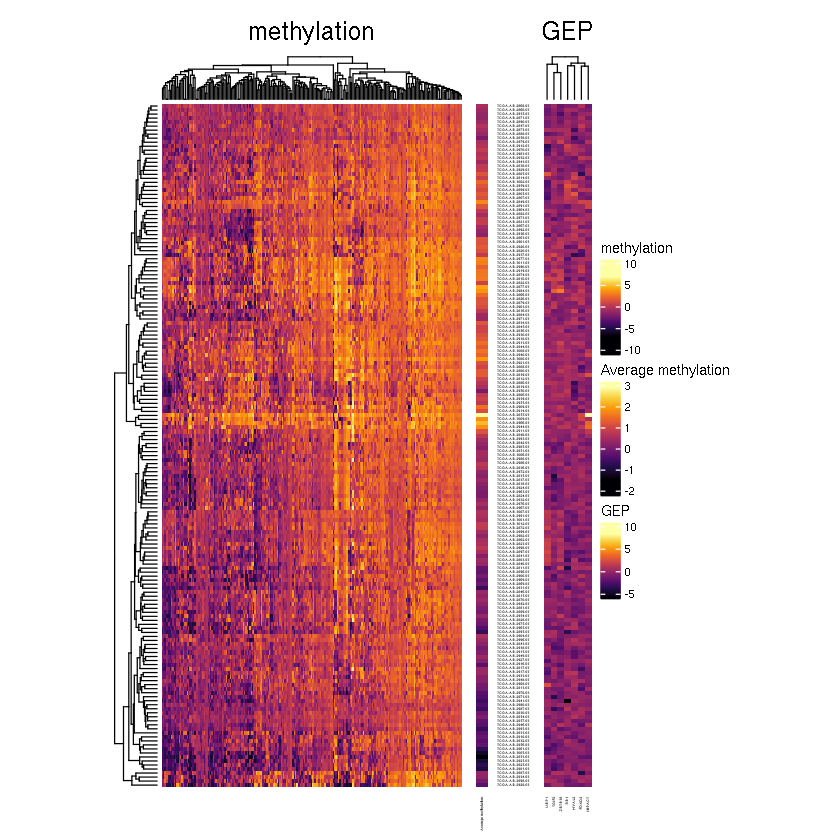

In [50]:
plotCluster(1)

      gene        coef
1    ARNTL -0.07754074
2     BBS7 -0.13305992
3    FOXD2  0.09577715
4    HMGA1 -0.19109039
5 IVNS1ABP  0.17959427
6      RB1  0.21403849
7     TET2 -0.28418734
8   ZBTB20  0.19694360
9  ZNF518B -0.12723064


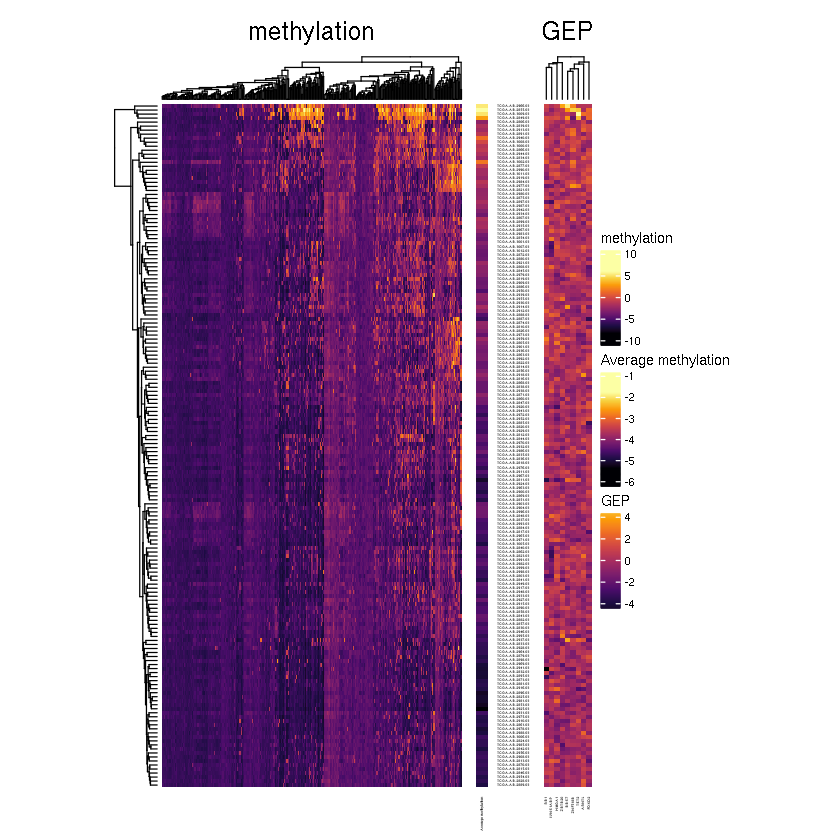

In [51]:
plotCluster(2)

  gene       coef
1 CBX1 -0.1538676
2 GLO1  0.1357942


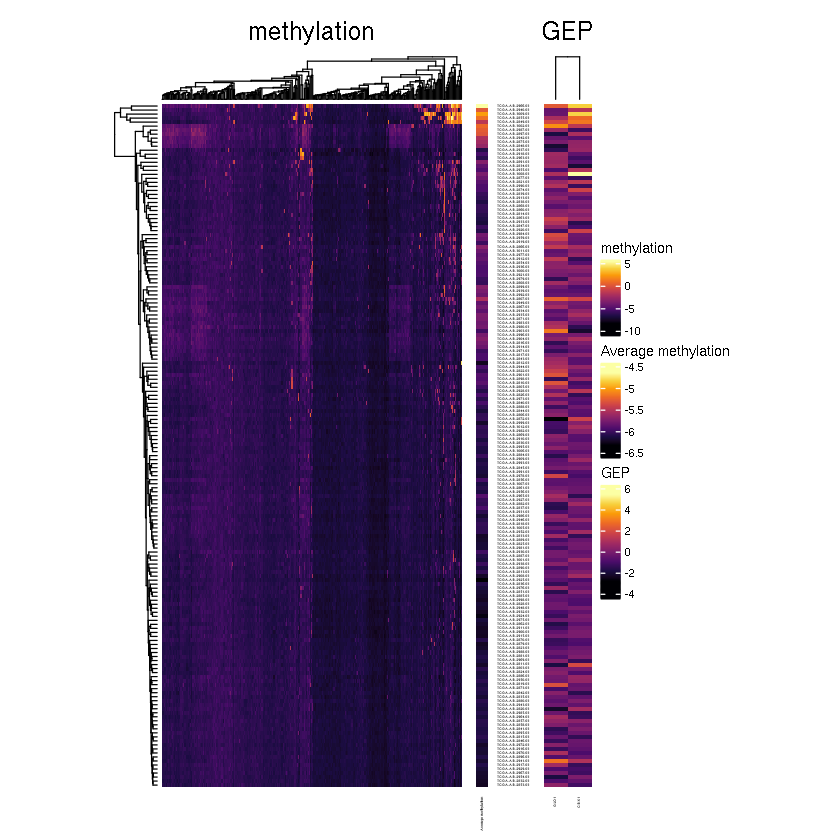

In [52]:
plotCluster(3) 

     gene        coef
1   CAMK4 -0.08785261
2    CPOX -0.23851624
3    PHB2 -0.24864440
4 SMARCA1 -0.04592950
5  ZBTB38 -0.16777875
6  ZNF563  0.16373154


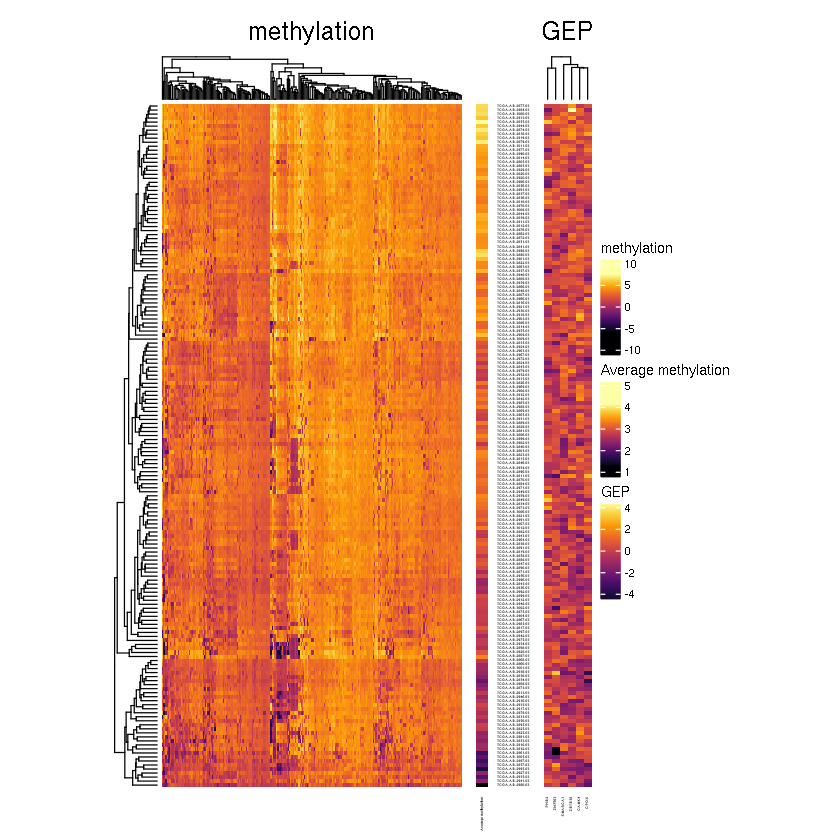

In [53]:
plotCluster(4)

     gene        coef
1   FOXD2  0.13547927
2  IMPACT -0.42280012
3   KLF11 -0.15485030
4   MED11 -0.35845215
5   MEIS1 -0.07695978
6   NCOA7  0.30414788
7     RB1  0.32433365
8    WNT6  0.12854589
9 ZNF354C -0.11606982


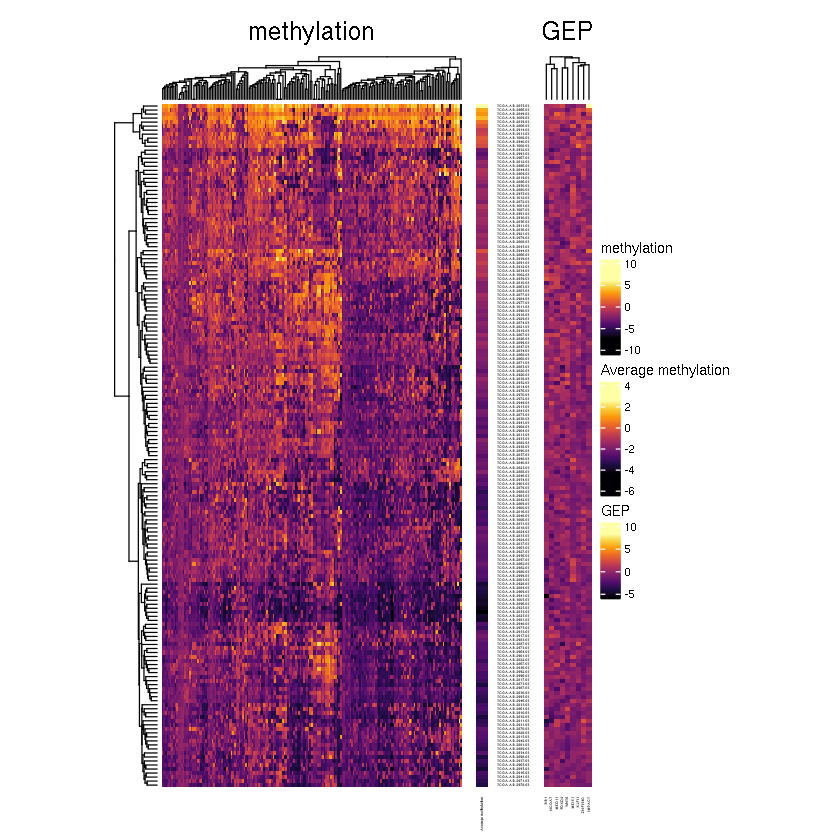

In [54]:
plotCluster(5)

     gene       coef
1   APBB1 -0.3357185
2   FOXD2  0.3354120
3 KHDRBS2 -0.2133309
4   NSUN7 -0.1643925
5  TFAP2E  0.7445063
6   ZNF14  0.8765386
7  ZNF626 -0.2499003


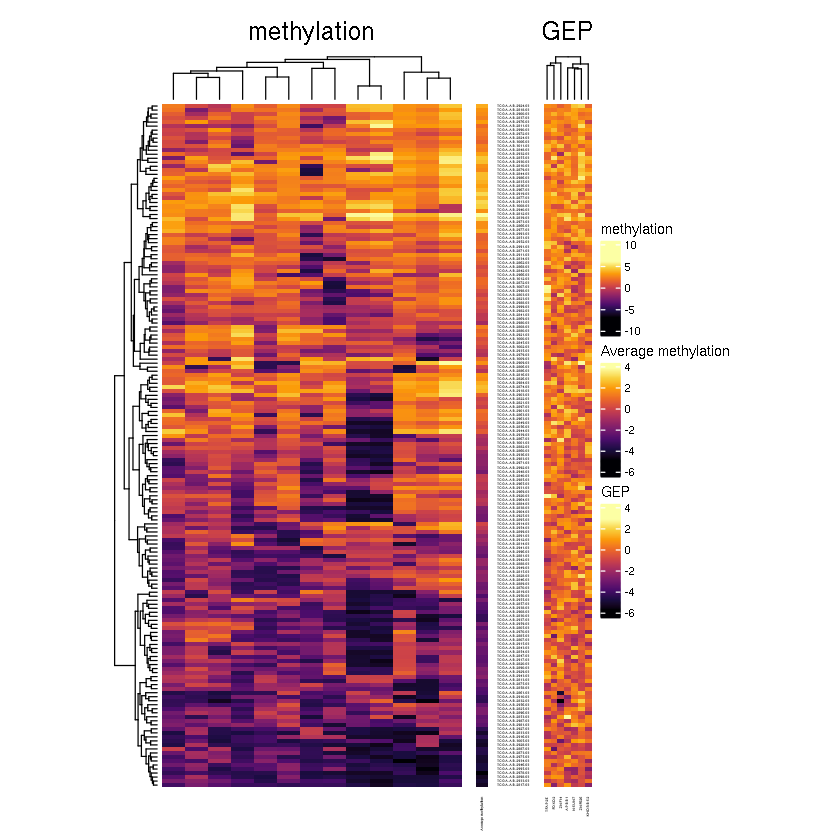

In [55]:
plotCluster(6)

Maximum iterations exceeded!
   gene        coef
1  ALAD -0.40273060
2 CAMK4 -0.09195193


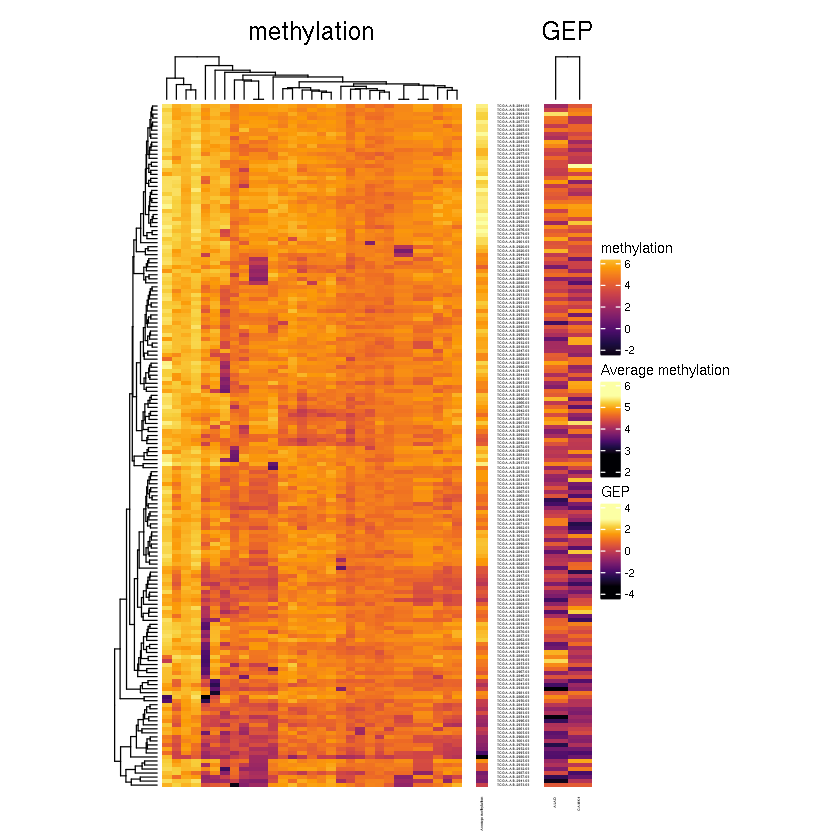

In [56]:
plotCluster(7)

## Ward.D2 method (3 clusters)

In [38]:
Figueroa.HM27 <- read.csv('/oak/stanford/groups/andrewg/users/szmamie/repos/MethylationPrediction/data/LAML/processed/Figueroa-HM27-imputed-M.4cluster.tsv',
                          stringsAsFactor=F, sep='\t', header=F)

In [39]:
head(Figueroa.HM27)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172
TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03,cluster,NA
PHF13,0.342376841331799,3.89910990638938,-0.325894750548895,2.1324051221441,0.604472915779244,4.27645233912584,0.093982236583543,1.60238123283841,-2.45781768914949,⋯,-0.201732689805535,2.94982830365201,-4.42311450565101,0.705369300814628,1.84476939112185,2.15034737355097,-4.59156551295046,4.08057608543529,1.00697327270491,1
THEM4,-6.36827289879088,-4.36827827171716,2.41865353299124,-1.14802693769955,-3.68997510054073,-4.17801001140916,-6.13787492336051,-2.60659130641118,-5.8448660027715,⋯,-5.99879639417634,-1.90991578946699,-6.35759738995619,-6.15121053439478,-5.42941792108019,-5.89069422606636,2.65178681945372,-4.85115230972334,-6.21498491274878,2
THEM4,-5.21716899409071,-4.24091372141387,2.58418959853561,-3.55389181085632,-4.64518052898568,-4.96078927083613,-4.37749236042948,-3.61620941407807,-4.02694333796336,⋯,-4.24156219647768,-2.34257177874539,-5.48668311609603,-4.21909981119363,-4.61143227690252,-5.18996023462207,2.84107771785998,-3.8406308798111,-4.19102583346301,2
FCRLB,-0.978281775572062,2.59080728362413,1.58735857052121,2.76007506000749,0.495133092658482,2.54831043250426,-0.976026781124583,0.38111039501668,2.16441953809506,⋯,1.72954532689211,2.71496242324587,1.94944303362134,0.567021074744388,1.93740834329463,2.75795431163522,1.63028527346264,2.75709448944657,0.367523122442393,3
FCRLB,3.99351803191588,-0.112637678729922,3.14516060680974,1.8200749887188,1.66151655705288,3.11832234701775,2.82423923482657,0.807743997787632,1.87537369171269,⋯,1.16345529473954,0.197095692841799,1.59035159341492,1.85928973603244,2.160242238105,2.41274154381557,3.54520329164219,2.69043025571349,1.57173403754469,3


In [40]:
HM27 <- data.matrix(Figueroa.HM27[-1,-1])

rownames(HM27) <- Figueroa.HM27[-1,1]
colnames(HM27) <- Figueroa.HM27[1,-dim(Figueroa.HM27)[2]]

head(HM27)

table(HM27[,dim(HM27)[2]]) # number of probes in each cluster

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03,cluster
PHF13,0.3423768,3.8991099,-0.3258948,2.1324051,0.6044729,4.276452,0.09398224,1.6023812,-2.457818,-1.0911698,⋯,-0.2017327,2.9498283,-4.423115,0.7053693,1.8447694,2.1503474,-4.591566,4.080576,1.0069733,1
THEM4,-6.3682729,-4.3682783,2.4186535,-1.1480269,-3.6899751,-4.178010,-6.13787492,-2.6065913,-5.844866,-1.9273946,⋯,-5.9987964,-1.9099158,-6.357597,-6.1512105,-5.4294179,-5.8906942,2.651787,-4.851152,-6.2149849,2
THEM4,-5.2171690,-4.2409137,2.5841896,-3.5538918,-4.6451805,-4.960789,-4.37749236,-3.6162094,-4.026943,-3.6255177,⋯,-4.2415622,-2.3425718,-5.486683,-4.2190998,-4.6114323,-5.1899602,2.841078,-3.840631,-4.1910258,2
FCRLB,-0.9782818,2.5908073,1.5873586,2.7600751,0.4951331,2.548310,-0.97602678,0.3811104,2.164420,2.6386810,⋯,1.7295453,2.7149624,1.949443,0.5670211,1.9374083,2.7579543,1.630285,2.757094,0.3675231,3
FCRLB,3.9935180,-0.1126377,3.1451606,1.8200750,1.6615166,3.118322,2.82423923,0.8077440,1.875374,2.0405827,⋯,1.1634553,0.1970957,1.590352,1.8592897,2.1602422,2.4127415,3.545203,2.690430,1.5717340,3
DNM3,-0.5110940,0.9897193,-1.1514153,-0.3820692,-0.6005072,1.554936,-0.46623189,1.4261528,-1.212581,-0.9601648,⋯,-0.9569933,0.4465626,-2.241730,0.7956812,-0.5655719,0.2543318,2.428098,1.742139,-0.7502622,1



  1   2   3   4 
163 312 310 317 

In [28]:
findClusterIdx <- function(i) {
    n <- dim(HM27)[2]
    which(HM27[,n] == i)
}

computeAverage <- function(idx) {
    n <- dim(HM27)[2]
    cluster.probes <- HM27[idx, -n]
    cbind(apply(cluster.probes, 2, mean), apply(cluster.probes, 2, sd))
}

In [29]:
# load the RNAseq data
rnaseq.raw <- read.csv('../data/LAML/processed/rnaseq-imputed-matched-filtered.tsv', sep='\t', stringsAsFactor=F, header=F)

rnaseq <- data.matrix(rnaseq.raw[-1, -1])
colnames(rnaseq) <- rnaseq.raw[1, -dim(rnaseq.raw)[2]]
rownames(rnaseq) <- rnaseq.raw[-1, 1]

In [30]:
# select 75 % / 25 % split
set.seed(1)
train.idx <- sample(colnames(rnaseq), round(dim(rnaseq)[2] * 0.75, 0))

In [31]:
rnaseq.train.idx <- colnames(rnaseq) %in% train.idx
sum(rnaseq.train.idx)

[1] 128

In [41]:
hm27.train.idx <- colnames(HM27) %in% train.idx
sum(hm27.train.idx)

[1] 128

In [42]:
findIdx <- function(gene) {
    which(rownames(rnaseq) %in% gene)
}
FindIdx <- Vectorize(findIdx)

In [53]:
n <- dim(HM27)[2]
plotCluster <- function(i) {
    set.seed(1)
    idx <- findClusterIdx(i)
    cluster.probes <- HM27[idx, -n]
    cluster.mean <- computeAverage(findClusterIdx(i))
    
    model.fit <- vbsr(y=cluster.mean, X=t(rnaseq), family='normal', eps=5e-15, 
                      n_orderings=15, maxit=10^4, estimation_type="MAXIMAL", post=0.95) 
    
    p.val <- model.fit$pval
    significant.idx <- qvalue(p.val, fdr.level=0.05)$significant
    
    coef.names <- rownames(rnaseq.train)[significant.idx]
    coef.significant <- model.fit$beta[significant.idx]
    res1 <- data.frame(gene=coef.names, coef=coef.significant)
    print(res1)
    
    ModuleHeatmap(t(cluster.probes), cluster.mean[,1], t(rnaseq[as.numeric(FindIdx(res1$gene)), ]), center=T, scale=T, coef=sign(res1$coef))
    return(res1)
}

      gene        coef
1     CPOX -0.26529322
2    FOXD2  0.10606678
3    KLF11 -0.08125480
4    PPARA  0.23279320
5      RB1  0.33880682
6  SMARCA1 -0.06483544
7   ZBTB38 -0.18191530
8   ZC3H7A -0.60288376
9    ZNF14  0.33163875
10  ZNF502 -0.08324946
    gene        coef
1   CBX1 -0.23786442
2  FOXD2  0.09972562
3    HGF  0.06389733
4 IMPACT -0.22273452
5  UBE3A  0.44866593
6 ZNF697 -0.11927808


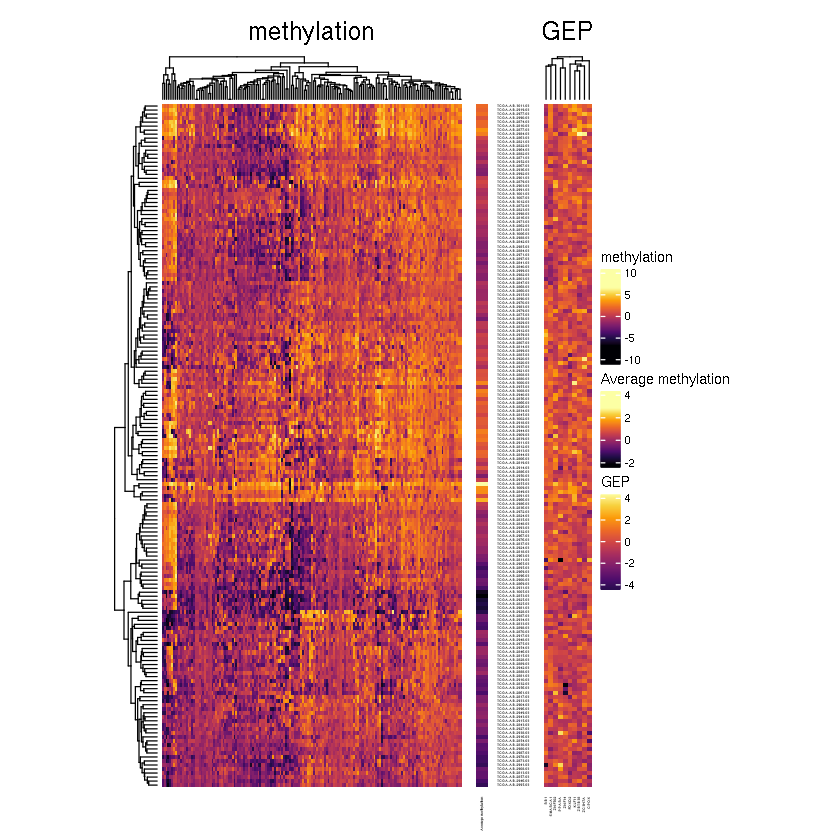

     gene        coef
1   CAMK4 -0.09639440
2    CPOX -0.22287723
3 SMARCA1 -0.05892157
4  ZBTB38 -0.13381097
5  ZNF607  0.17653056
6  ZNF652  0.28451266


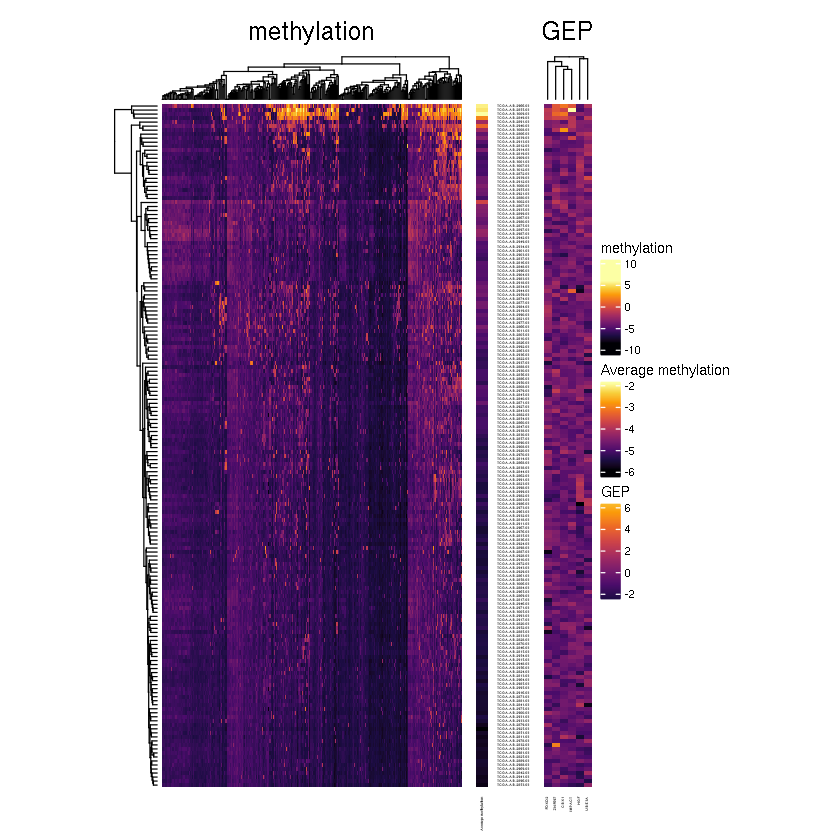

      gene        coef
1     CBX1 -0.31195586
2    FOXD2  0.12779609
3 GTF2IRD1  0.08724336
4   IMPACT -0.25854096
5    KLF11 -0.18432399
6      RB1  0.39171093
7    ZNF14  0.30209346


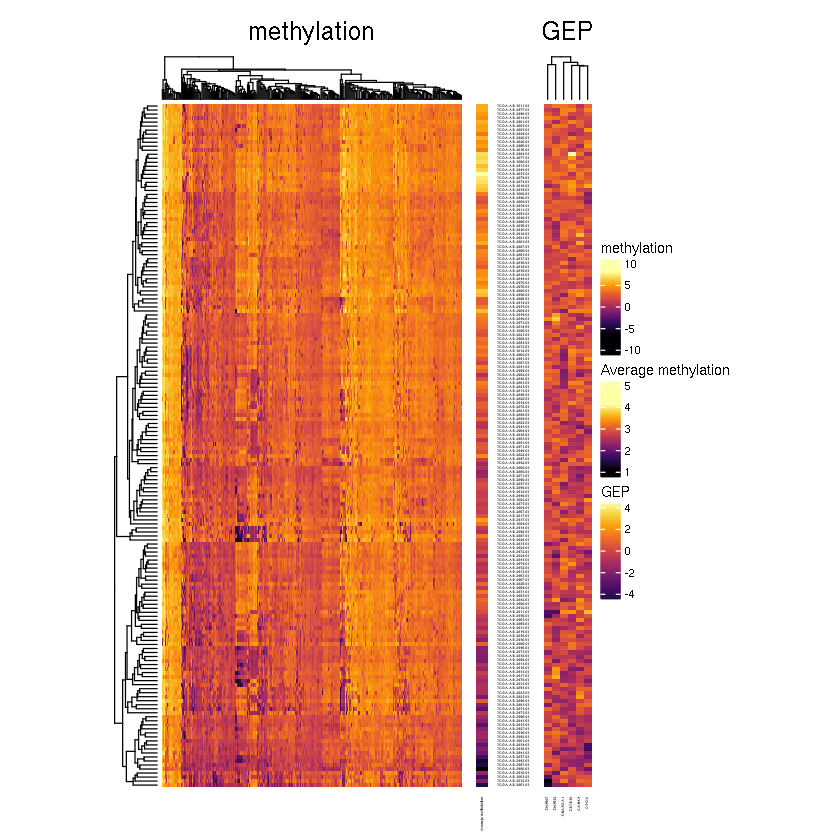

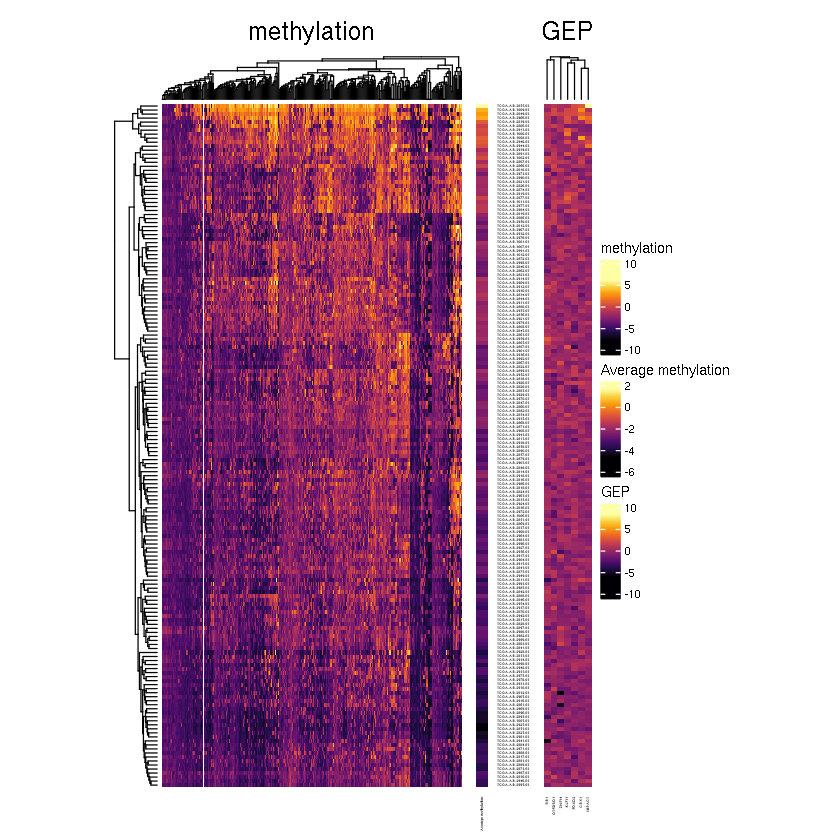

In [54]:
res <- list()
for (i in seq(4)) {
    res[[i]] <- plotCluster(i)
}

In [63]:
genes.predictors <- c()
for (i in seq(4)) {
    genes.predictors <- c(genes.predictors, as.character(res[[i]][,1]))
}

In [65]:
table(genes.predictors)

genes.predictors
   CAMK4     CBX1     CPOX    FOXD2 GTF2IRD1      HGF   IMPACT    KLF11 
       1        2        2        3        1        1        2        2 
   PPARA      RB1  SMARCA1    UBE3A   ZBTB38   ZC3H7A    ZNF14   ZNF502 
       1        2        2        1        2        1        2        1 
  ZNF607   ZNF652   ZNF697 
       1        1        1 

In [66]:
unique(genes.predictors)

[1] "CPOX"     "FOXD2"    "KLF11"    "PPARA"    "RB1"      "SMARCA1" 
 [7] "ZBTB38"   "ZC3H7A"   "ZNF14"    "ZNF502"   "CBX1"     "HGF"     
[13] "IMPACT"   "UBE3A"    "ZNF697"   "CAMK4"    "ZNF607"   "ZNF652"  
[19] "GTF2IRD1"

In [69]:
write.table(unique(genes.predictors), file='../data/LAML/processed/predictors.tsv', quote=F, sep='\t', row.names=F, col.names=F)